# Linear Regrression with Boston Housing


In [1]:
# Libraries for data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Libraries for error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Mount Google Drive

In [2]:
from google.colab import drive 
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Shape of the Data Frame

In [5]:
df.shape

(17000, 9)

Information of the data frame


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
print(X.shape, y.shape)

(17000, 8) (17000,)


In [11]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13600, 8) (3400, 8) (13600,) (3400,)


MinMax Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
tmp = pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5,6,7
count,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000
mean,0.482551,0.327069,0.542284,0.069519,0.083567,0.040048,0.082229,0.232760
std,0.203859,0.226774,0.247018,0.057161,0.065365,0.032523,0.063121,0.131696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255341,0.147715,0.333333,0.038381,0.045779,0.022002,0.046045,0.142507
50%,0.592065,0.181722,0.549020,0.055964,0.067349,0.032792,0.067259,0.209383
75%,0.640895,0.549416,0.705882,0.083122,0.100403,0.048292,0.099326,0.293106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
LR = LinearRegression()
LR = LR.fit(X_train,y_train)

In [16]:
y_train_predict = LR.predict(X_train)
y_test_predict = LR.predict(X_test)

In [17]:
print('R2 score for training data : ', r2_score(y_train,y_train_predict))

print('R2 score for testing data : ', r2_score(y_test,y_test_predict))

R2 score for training data :  0.6352694644505288
R2 score for testing data :  0.6636396350243803


In [18]:
print('Mean Squared error for training data : ', mean_squared_error(y_train, y_train_predict))
print('Mean Squared error for testing data : ', mean_squared_error(y_test, y_test_predict))

Mean Squared error for training data :  4875656612.327819
Mean Squared error for testing data :  4634658406.223354


In [19]:
print('Mean absolute error for training data : ', mean_absolute_error(y_train, y_train_predict))
print('Mean absolute error for testing data : ', mean_absolute_error(y_test, y_test_predict))

Mean absolute error for training data :  51008.78488384543
Mean absolute error for testing data :  49983.47465122919


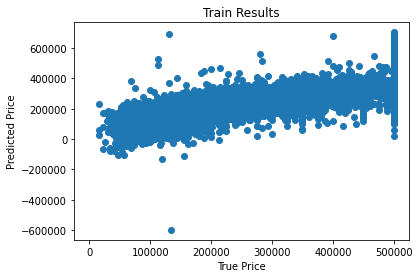

In [25]:

plt.scatter(x=y_train, y=y_train_predict)
plt.plot([0,50],[0,50],'--k')
plt.axis('tight')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Train Results')
plt.show()

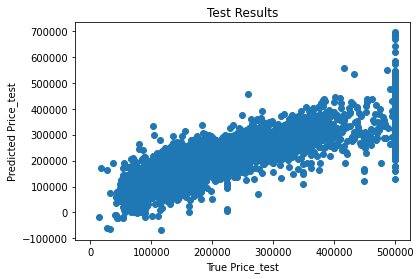

In [27]:
plt.scatter(x=y_test, y=y_test_predict)
plt.plot([0,50],[0,50],'--k')
plt.axis('tight')
plt.xlabel('True Price_test')
plt.ylabel('Predicted Price_test')
plt.title('Test Results')
plt.show()